In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Se carga el dataframe

df = pd.read_excel("Datos_covid_ZBS_03_marzo.xlsx")
df

,zona_basica_salud,fecha_informe,casos_confirmados_activos_ultimos_14dias,tasa_incidencia_acumulada_activos_ultimos_14dias,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total,codigo_geometria
0,Abrantes,2021-03-02 10:51:00,NaN,NaN,66.0,214.65,2812,9145.31,1
1,Acacias,2021-03-02 10:51:00,NaN,NaN,56.0,288.18,1489,7662.62,2
2,Adelfas,2021-03-02 10:51:00,NaN,NaN,75.0,257.13,2351,8060.20,3
3,Alameda,2021-03-02 10:51:00,NaN,NaN,64.0,300.84,1877,8822.98,4
4,Alameda de Osuna,2021-03-02 10:51:00,NaN,NaN,88.0,303.44,2106,7261.82,5
...,...,...,...,...,...,...,...,...,...
11721,Virgen de Begoña,2020-05-26 07:00:00,NaN,0.00,NaN,20.74,191,1980.51,282
11722,Virgen del Cortijo,2020-05-26 07:00:00,NaN,0.00,NaN,0.00,135,960.31,283
11723,Virgen del Val,2020-05-26 07:00:00,NaN,7.07,NaN,14.15,133,940.66,284
11724,Vista Alegre,2020-05-26 07:00:00,6.0,16.23,18.0,48.70,389,1052.46,285


In [3]:
#Se eliminan las variables que hacen referencia a los casos confirmados activos y la tasa de incidencia acumulada activa, ambos de los últimos 14 días
#Esto se hace porque un gran porcentaje de registros no tienen datos para estas variables
#Y porque en realidad la información que interesa ya se tiene en las variables de casos confirmados e incidencia acumulada a 14 días
#También se elimina la variable "código_geometria", ya que tampoco es útil para este estudio

df.drop(["casos_confirmados_activos_ultimos_14dias", "tasa_incidencia_acumulada_activos_ultimos_14dias", "codigo_geometria"], axis = 1, inplace = True)
df

,zona_basica_salud,fecha_informe,casos_confirmados_ultimos_14dias,tasa_incidencia_acumulada_ultimos_14dias,casos_confirmados_totales,tasa_incidencia_acumulada_total
0,Abrantes,2021-03-02 10:51:00,66.0,214.65,2812,9145.31
1,Acacias,2021-03-02 10:51:00,56.0,288.18,1489,7662.62
2,Adelfas,2021-03-02 10:51:00,75.0,257.13,2351,8060.20
3,Alameda,2021-03-02 10:51:00,64.0,300.84,1877,8822.98
4,Alameda de Osuna,2021-03-02 10:51:00,88.0,303.44,2106,7261.82
...,...,...,...,...,...,...
11721,Virgen de Begoña,2020-05-26 07:00:00,NaN,20.74,191,1980.51
11722,Virgen del Cortijo,2020-05-26 07:00:00,NaN,0.00,135,960.31
11723,Virgen del Val,2020-05-26 07:00:00,NaN,14.15,133,940.66
11724,Vista Alegre,2020-05-26 07:00:00,18.0,48.70,389,1052.46


In [4]:
#Se renombran las columnas para que sean más entendibles

df.columns = ["Zona básica", "Fecha", "Casos confirmados (14 días)", "IA (14 días)", "Casos confirmados totales", "IA total"]
df

,Zona básica,Fecha,Casos confirmados (14 días),IA (14 días),Casos confirmados totales,IA total
0,Abrantes,2021-03-02 10:51:00,66.0,214.65,2812,9145.31
1,Acacias,2021-03-02 10:51:00,56.0,288.18,1489,7662.62
2,Adelfas,2021-03-02 10:51:00,75.0,257.13,2351,8060.20
3,Alameda,2021-03-02 10:51:00,64.0,300.84,1877,8822.98
4,Alameda de Osuna,2021-03-02 10:51:00,88.0,303.44,2106,7261.82
...,...,...,...,...,...,...
11721,Virgen de Begoña,2020-05-26 07:00:00,NaN,20.74,191,1980.51
11722,Virgen del Cortijo,2020-05-26 07:00:00,NaN,0.00,135,960.31
11723,Virgen del Val,2020-05-26 07:00:00,NaN,14.15,133,940.66
11724,Vista Alegre,2020-05-26 07:00:00,18.0,48.70,389,1052.46


In [5]:
#Se modifica la variable "Fecha", eliminando la hora y dejando únicamente lo que es propiamente la fecha

df["Fecha"] = df["Fecha"].apply(lambda x : x.date())
df

,Zona básica,Fecha,Casos confirmados (14 días),IA (14 días),Casos confirmados totales,IA total
0,Abrantes,2021-03-02,66.0,214.65,2812,9145.31
1,Acacias,2021-03-02,56.0,288.18,1489,7662.62
2,Adelfas,2021-03-02,75.0,257.13,2351,8060.20
3,Alameda,2021-03-02,64.0,300.84,1877,8822.98
4,Alameda de Osuna,2021-03-02,88.0,303.44,2106,7261.82
...,...,...,...,...,...,...
11721,Virgen de Begoña,2020-05-26,NaN,20.74,191,1980.51
11722,Virgen del Cortijo,2020-05-26,NaN,0.00,135,960.31
11723,Virgen del Val,2020-05-26,NaN,14.15,133,940.66
11724,Vista Alegre,2020-05-26,18.0,48.70,389,1052.46


In [6]:
#Se eliminan todos aquellos registros anteriores al mes de septiembre de 2020, es decir, anteriores al comienzo de los confinamientos por zonas básicas de salud
#Aunque estos confinamientos comenzaron a mediados-finales de septiembre, es recomendable dejar unos cuántos registros anteriores para poder observar la evolución
#En total se eliminan 2860 registros

indices = df[df["Fecha"].isin([datetime.date(2020, 8, 25),
                     datetime.date(2020, 8, 18),
                     datetime.date(2020, 8, 11),
                     datetime.date(2020, 8, 4),
                     datetime.date(2020, 7, 28),
                     datetime.date(2020, 7, 21),
                     datetime.date(2020, 7, 14),
                     datetime.date(2020, 7, 7),
                     datetime.date(2020, 6, 30),
                     datetime.date(2020, 6, 23),
                     datetime.date(2020, 6, 16),
                     datetime.date(2020, 6, 9),
                     datetime.date(2020, 6, 2),
                     datetime.date(2020, 5, 26)])].index

df.drop(indices, inplace = True)
df

,Zona básica,Fecha,Casos confirmados (14 días),IA (14 días),Casos confirmados totales,IA total
0,Abrantes,2021-03-02,66.0,214.65,2812,9145.31
1,Acacias,2021-03-02,56.0,288.18,1489,7662.62
2,Adelfas,2021-03-02,75.0,257.13,2351,8060.20
3,Alameda,2021-03-02,64.0,300.84,1877,8822.98
4,Alameda de Osuna,2021-03-02,88.0,303.44,2106,7261.82
...,...,...,...,...,...,...
7717,Virgen de Begoña,2020-09-01,48.0,497.72,283,2934.47
7718,Virgen del Cortijo,2020-09-01,47.0,334.33,367,2610.61
7719,Virgen del Val,2020-09-01,18.0,127.31,182,1287.22
7720,Vista Alegre,2020-09-01,300.0,811.67,920,2489.11


In [7]:
#De otro archivo se importa la lista de zonas básicas de salud que pertenecen al municipio de Madrid
#Y se deja el dataframe a estudiar únicamente con estas zonas básicas de salud

df_zbs = pd.read_excel("Zonas_confinadas.xlsx", sheet_name = "Listado_ZBS_Madrid_capital")
zbs_madrid = df_zbs["ZBS_Madrid"].tolist()

df_capital = df[df["Zona básica"].isin(zbs_madrid)]
df_capital

,Zona básica,Fecha,Casos confirmados (14 días),IA (14 días),Casos confirmados totales,IA total
0,Abrantes,2021-03-02,66.0,214.65,2812,9145.31
1,Acacias,2021-03-02,56.0,288.18,1489,7662.62
2,Adelfas,2021-03-02,75.0,257.13,2351,8060.20
3,Alameda,2021-03-02,64.0,300.84,1877,8822.98
4,Alameda de Osuna,2021-03-02,88.0,303.44,2106,7261.82
...,...,...,...,...,...,...
7716,Vinateros - Torito,2020-09-01,124.0,400.67,739,2387.88
7717,Virgen de Begoña,2020-09-01,48.0,497.72,283,2934.47
7718,Virgen del Cortijo,2020-09-01,47.0,334.33,367,2610.61
7720,Vista Alegre,2020-09-01,300.0,811.67,920,2489.11


In [8]:
#Se observa que prácticamente todos los datos son no nulos
#Únicamente hay 5 valores nulos en la variable "Casos confirmados (14 días)"
#Pero como esta variable no se usa, no tiene incidencia en el análisis

df_capital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 7721
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Zona básica                  3618 non-null   object 
 1   Fecha                        3618 non-null   object 
 2   Casos confirmados (14 días)  3613 non-null   float64
 3   IA (14 días)                 3618 non-null   float64
 4   Casos confirmados totales    3618 non-null   int64  
 5   IA total                     3618 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 197.9+ KB


In [9]:
#Se importa un tercer dataframe que contiene las ZBS confinadas por semana
#Se cambia el formato de las columnas, para que facilite los posteriores códigos

df_confinamiento = pd.read_excel("Zonas_confinadas.xlsx", sheet_name = "Fechas_ZBS_confinadas")
columnas = []

for i in df_confinamiento.columns:
    columnas.append(i.date())
    
df_confinamiento.columns = columnas

df_confinamiento

,2020-09-22,2020-09-29,2020-10-27,2020-11-03,2020-11-10,2020-11-17,2020-11-24,2020-12-01,2020-12-09,2020-12-15,...,2020-12-29,2021-01-05,2021-01-12,2021-01-19,2021-01-26,2021-02-02,2021-02-09,2021-02-16,2021-02-23,2021-03-02
0,Puerta Bonita,Puerta Bonita,Nuñez Morgado,Nuñez Morgado,Nuñez Morgado,Nuñez Morgado,Guzmán el Bueno,Guzmán el Bueno,Guzmán el Bueno,La Elipa,...,Andrés Mellado,Andrés Mellado,Andrés Mellado,Andrés Mellado,Andrés Mellado,Andrés Mellado,Andrés Mellado,Andrés Mellado,Andrés Mellado,Andrés Mellado
1,Vista Alegre,Vista Alegre,Guzmán el Bueno,Guzmán el Bueno,Guzmán el Bueno,Guzmán el Bueno,Entrevías,Daroca,La Elipa,NaN,...,Sanchinarro,Sanchinarro,Sanchinarro,Sanchinarro,Sanchinarro,Sanchinarro,Sanchinarro,Aravaca,Aravaca,General Oráa
2,Guayaba,Guayaba,San Andrés,San Andrés,San Andrés,Entrevías,Pozo de Tío Raimundo,Vicálvaro - Artilleros,NaN,NaN,...,Aravaca,Aravaca,Aravaca,Aravaca,Aravaca,Aravaca,Aravaca,General Moscardó,Jazmín,Vinateros - Torito
3,Almendrales,Almendrales,San Cristóbal,San Cristóbal,San Cristóbal,Pozo de Tío Raimundo,Alcalá de Guadaira,La Elipa,NaN,NaN,...,General Moscardó,General Moscardó,General Moscardó,General Moscardó,General Moscardó,General Moscardó,General Moscardó,Jazmín,Montesa,NaN
4,Las Calesas,Las Calesas,El Espinillo,El Espinillo,El Espinillo,Alcalá de Guadaira,Numancia,NaN,NaN,NaN,...,NaN,Virgen del Cortijo,Virgen del Cortijo,Virgen del Cortijo,Virgen del Cortijo,Virgen del Cortijo,Virgen del Cortijo,Montesa,General Oráa,NaN
5,Zofío,Zofío,Entrevías,Entrevías,Entrevías,Numancia,Daroca,NaN,NaN,NaN,...,NaN,NaN,Barajas,Barajas,Barajas,Barajas,Barajas,General Oráa,Vinateros - Torito,NaN
6,Orcasur,Orcasur,Peña Prieta,Peña Prieta,Peña Prieta,Daroca,Pavones,NaN,NaN,NaN,...,NaN,NaN,Alameda de Osuna,Alameda de Osuna,Alameda de Osuna,Silvano,Silvano,Alpes,NaN,NaN
7,San Fermín,San Fermín,Pozo de Tío Raimundo,Pozo de Tío Raimundo,Pozo de Tío Raimundo,Pavones,Vandel,NaN,NaN,NaN,...,NaN,NaN,Benita de Ávila,Benita de Ávila,Benita de Ávila,Mirasierra,Mirasierra,Rejas,NaN,NaN
8,San Andrés,San Andrés,Alcalá de Guadaira,Alcalá de Guadaira,Alcalá de Guadaira,Vandel,Infanta Mercedes,NaN,NaN,NaN,...,NaN,NaN,Silvano,Silvano,Silvano,Jazmín,Jazmín,Pozo de Tío Raimundo,NaN,NaN
9,San Cristóbal,San Cristóbal,Rafael Alberti,Rafael Alberti,Rafael Alberti,Puerta del Ángel,Vicálvaro - Artilleros,NaN,NaN,NaN,...,NaN,NaN,Mirasierra,Mirasierra,Mirasierra,Montesa,Montesa,NaN,NaN,NaN


In [10]:
#Se obtiene un dataframe con la variable "Confinamiento", la cual toma valores 0 ó 1
#Un 0 implica que esa ZBS no estuvo confinada dicha semana
#Un 1 implica que esa ZBS sí estuvo confinada esa semana

df_final = df_capital.copy()
df_final.reset_index(drop = True, inplace = True)
df_final.loc[:,"Confinamiento"] = np.nan

for i in range(df_confinamiento.shape[0]):
    for j in range(df_confinamiento.shape[1]):
        fecha = df_confinamiento.columns[j]
        zbs = df_confinamiento.iloc[i,j]
        indice = df_final[(df_final["Fecha"] == fecha) & (df_final["Zona básica"] == zbs)].index
        df_final.loc[indice, "Confinamiento"] = 1


df_final["Confinamiento"].replace(np.nan, 0, inplace = True)
df_final.loc[:,"Confinamiento"] = df_final["Confinamiento"].astype("int8")
df_final.sort_values(["Zona básica", "Fecha"], ascending = [True, False], inplace = True)
df_final.reset_index(drop = True, inplace = True)
df_final

,Zona básica,Fecha,Casos confirmados (14 días),IA (14 días),Casos confirmados totales,IA total,Confinamiento
0,Abrantes,2021-03-02,66.0,214.65,2812,9145.31,0
1,Abrantes,2021-02-23,110.0,357.75,2775,9024.98,0
2,Abrantes,2021-02-16,153.0,497.59,2746,8930.66,0
3,Abrantes,2021-02-09,196.0,637.44,2665,8667.23,0
4,Abrantes,2021-02-02,253.0,822.82,2591,8426.56,0
...,...,...,...,...,...,...,...
3613,Ángela Uriarte,2020-09-29,294.0,1084.83,1546,5704.59,1
3614,Ángela Uriarte,2020-09-22,316.0,1166.01,1321,4874.36,1
3615,Ángela Uriarte,2020-09-15,323.0,1191.84,1141,4210.18,0
3616,Ángela Uriarte,2020-09-08,235.0,867.13,914,3372.57,0


In [11]:
#Se crean dos diccionarios (uno para ZBS confinadas y otro para ZBS que no lo están)
#Las claves son cada una de las fechas y los valores son listas con las variaciones porcentuales de la IA por ZBS
#Para saber si un registro pertenece a las zonas confinadas o no, lo que hay que analizar es la situación en la que se encontraba esa zona la semana anterior
#Si estaba confinada, la variable "Confinamiento" vale 1; si no lo estaba vale 0

confinamiento = {}
normalidad = {}

for i in range(len(df_final)-1):
    if df_final.loc[i, "Zona básica"] == df_final.loc[i+1, "Zona básica"]:
        fecha = df_final.loc[i, "Fecha"]
        if df_final.loc[i+1, "Confinamiento"] == 1:
            variación = round((df_final.loc[i, "IA (14 días)"] - df_final.loc[i+1, "IA (14 días)"])*100 / df_final.loc[i+1, "IA (14 días)"],2)
            try:
                valor = confinamiento[fecha]
                valor.append(variación)
                confinamiento[fecha] = valor
            except:
                confinamiento[fecha] = [variación]

        else:
            variación = round((df_final.loc[i, "IA (14 días)"] - df_final.loc[i+1, "IA (14 días)"])*100 / df_final.loc[i+1, "IA (14 días)"],2)
            try:
                valor = normalidad[fecha]
                valor.append(variación)
                normalidad[fecha] = valor
            except:
                normalidad[fecha] = [variación]            
                
confinamiento

{datetime.date(2021, 2, 2): [-19.16,
  -2.84,
  20.09,
  -7.67,
  -14.53,
  -9.22,
  -26.49,
  1.75,
  17.42,
  2.94,
  -4.62,
  0.0,
  10.76,
  28.97,
  2.45,
  0.0,
  0.0],
 datetime.date(2021, 1, 26): [-8.94,
  14.29,
  29.38,
  -1.17,
  5.52,
  29.36,
  5.11,
  41.62,
  41.38,
  -3.25,
  5.69,
  -7.1,
  23.65,
  10.69,
  21.7,
  12.5,
  -4.03],
 datetime.date(2021, 1, 19): [-2.49,
  27.27,
  22.92,
  7.52,
  30.4,
  23.86,
  36.43,
  35.29,
  26.88,
  13.36,
  23.0,
  19.73,
  16.67,
  12.93,
  16.92,
  13.04,
  22.13],
 datetime.date(2020, 12, 1): [-14.29,
  -33.03,
  -19.72,
  -19.57,
  21.43,
  -23.08,
  3.13,
  -17.5,
  -15.0,
  -19.3,
  -30.91],
 datetime.date(2020, 11, 24): [-30.0,
  -6.84,
  -29.0,
  -2.13,
  -30.0,
  -22.89,
  -8.0,
  -31.03,
  -23.08,
  -18.61,
  -18.57,
  1.56,
  47.83],
 datetime.date(2020, 11, 17): [-25.93,
  -25.0,
  -3.45,
  -20.63,
  -15.32,
  -11.11,
  -2.35,
  -32.43,
  9.43,
  -16.67,
  -10.34,
  -30.64,
  -3.17,
  9.84,
  12.28,
  -2.78,
  -20.99

In [12]:
#En cada uno de los dos diccionarios se calcula la media de la variación del aIA por fecha

for i in confinamiento:
    lista = confinamiento[i]
    media = round(np.array(lista).mean(),2)
    confinamiento[i] = media
    
for i in normalidad:
    lista = normalidad[i]
    media = round(np.array(lista).mean(),2)
    normalidad[i] = media
    
confinamiento

{datetime.date(2021, 2, 2): -0.01,
 datetime.date(2021, 1, 26): 12.73,
 datetime.date(2021, 1, 19): 20.34,
 datetime.date(2020, 12, 1): -15.26,
 datetime.date(2020, 11, 24): -13.14,
 datetime.date(2020, 11, 17): -11.16,
 datetime.date(2020, 11, 10): -14.93,
 datetime.date(2020, 11, 3): -16.39,
 datetime.date(2020, 10, 6): -23.39,
 datetime.date(2020, 9, 29): -11.65,
 datetime.date(2021, 2, 23): -34.96,
 datetime.date(2021, 2, 16): -29.43,
 datetime.date(2021, 2, 9): -16.98,
 datetime.date(2021, 3, 2): -32.28,
 datetime.date(2021, 1, 12): 41.05,
 datetime.date(2021, 1, 5): 2.46,
 datetime.date(2020, 12, 29): 15.63,
 datetime.date(2020, 12, 9): -13.4,
 datetime.date(2020, 12, 15): -9.85,
 datetime.date(2020, 12, 22): 34.37}

In [13]:
#Se crea un dataframe a partir del diccionario de las zonas confinadas

df_confinamiento = pd.DataFrame.from_dict(confinamiento, orient = "index").reset_index()
df_confinamiento.columns = ["Fecha", "Variación (%)"]
df_confinamiento.sort_values("Fecha", inplace = True)
df_confinamiento.reset_index(drop = True, inplace = True)
df_confinamiento

,Fecha,Variación (%)
0,2020-09-29,-11.65
1,2020-10-06,-23.39
2,2020-11-03,-16.39
3,2020-11-10,-14.93
4,2020-11-17,-11.16
5,2020-11-24,-13.14
6,2020-12-01,-15.26
7,2020-12-09,-13.40
8,2020-12-15,-9.85
9,2020-12-22,34.37


In [14]:
#Se crea un dataframe a partir del diccionario de las zonas no confinadas

df_normalidad = pd.DataFrame.from_dict(normalidad, orient = "index").reset_index()
df_normalidad.columns = ["Fecha", "Variación (%)"]
df_normalidad.sort_values("Fecha", inplace = True)
df_normalidad.reset_index(drop = True, inplace = True)
df_normalidad

,Fecha,Variación (%)
0,2020-09-08,22.89
1,2020-09-15,21.38
2,2020-09-22,20.01
3,2020-09-29,4.12
4,2020-10-06,-19.94
5,2020-10-13,-22.18
6,2020-10-20,-8.19
7,2020-10-27,-4.06
8,2020-11-03,-9.27
9,2020-11-10,-7.29


In [15]:
# Se crea una lista con cadenas de texto que incluyen las fechas para las que se tienen datos
#Esta lista se usa posteriormente para la representación de los datos

fechas = [
        "08 Sep",
        "15 Sep",
        "22 Sep",
        "29 Sep",
        "06 Oct",
        "13 Oct",
        "20 Oct",
        "27 Oct",
        "03 Nov",
        "10 Nov",
        "17 Nov",
        "24 Nov",
        "01 Dic",
        "09 Dic",
        "15 Dic",
        "22 Dic",
        "29 Dic",
        "05 Ene",
        "12 Ene",
        "19 Ene",
        "26 Ene",
        "02 Feb",
        "09 Feb",
        "16 Feb",
        "23 Feb",
        "02 Mar"
]

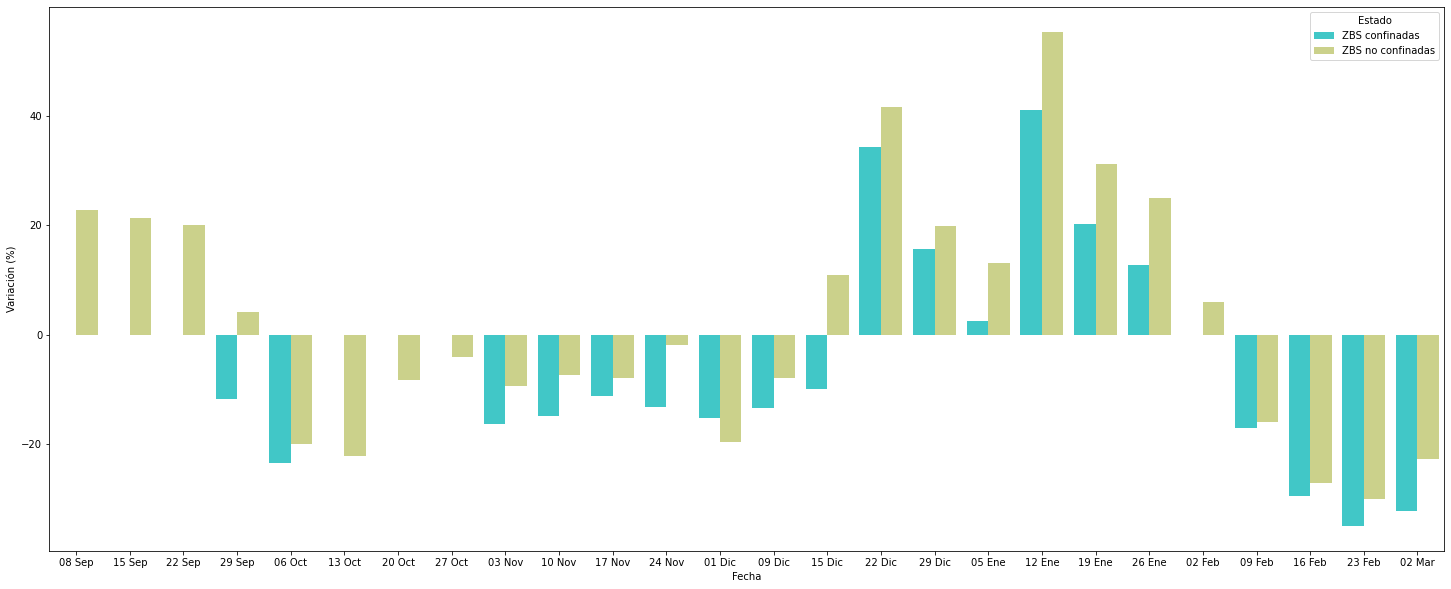

In [16]:
#Se organizan los datos para poder realizar la gráfica final

confinamiento_grafica = list(df_confinamiento["Variación (%)"])

for i in range(3):
    confinamiento_grafica.insert(i,0.0)
    
for i in range(5,8):
     confinamiento_grafica.insert(i,0.0)

df_grafica = pd.DataFrame()
df_grafica["Fecha"] = df_normalidad["Fecha"]
df_grafica["Variación (%)"] = confinamiento_grafica
df_grafica = pd.concat([df_grafica, df_normalidad], axis = 0)
df_grafica["Fecha"] = fechas*2
df_grafica.reset_index(drop = True, inplace = True)

for i in range(len(df_grafica)):
    if i < len(df_grafica)/2:
        df_grafica.loc[i,"Estado"] = "ZBS confinadas"
    else:
        df_grafica.loc[i,"Estado"] = "ZBS no confinadas"

fig, ax = plt.subplots(figsize=(25,10))
fig = sns.barplot(x = df_grafica["Fecha"], y = df_grafica["Variación (%)"], hue = df_grafica["Estado"], palette="rainbow")
plt.savefig("Resultado_seaborn.png")
plt.show()